<a href="https://colab.research.google.com/github/daniel-lorenzo/Mecanica/blob/main/TP1/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio n°2
Se dispara un cañon de masa $M$ con retroceso controlado por un resorte y un recorrido $d$. Luego del disparo, la velocidad del arma es $V_r$. Al final del retroceso, se acopla un amortiguador para que el cañon vuelva a su posición en el menor tiempo posible, sin oscilación.

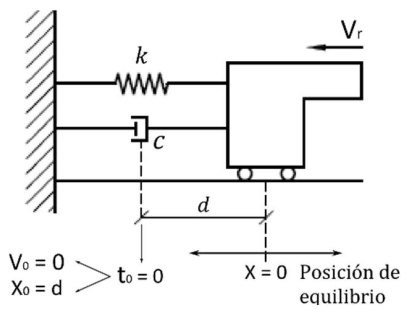

1. Determinar la constante $k$ del resorte y el coeficiente $c$ del amortiguador.
2. Calcular el tiempo que tarda el sistema en alcanzar el 90%, 95% y 99% de la posición de equilibrio.

### Solución

__1. Determinar la constante $k$ del resorte y el coeficiente $c$ del amortiguador.__

En la figura se muestra el modelo mecánico del problema. Como el amortiguador se acopla al final del retroceso, durante el mismo no se produce disipación de energía y, por tanto, la energía cinética del cañón se convierte en energía potencial elástica acumulada en el resorte, esto es:

$$\mbox{Energia cinetica = Energia potencial}$$

$V_0 = V_r$
$$\frac{1}{2} m V^2_0 = \frac{1}{2} k d^2 $$

$\therefore$
$$ k = \frac{M V^2_0}{d^2} $$

Se sabe que:
$$\begin{array}{ll}
\displaystyle p = \sqrt{ \frac{k}{M} } & \qquad \mbox{(frecuencia natural del sistema)} \\
c = 2nM & \qquad \mbox{(coeficiente de amortiguamiento viscoso)}
\end{array}$$

Por otro lado, se detalla que al final del retroceso se acopla una amortiguador para que el cañón vuelva a su posición de equilibrio en el menor tiempo posible, sin oscilación (amplitud nunca cambia de signo). Esto significa que el sistema tiene amortiguamiento crítico, por lo tanto:

Sistema críticamente amortiguado:
$$\frac{n}{n_c} = 1 \quad \Rightarrow \quad \mbox{(No oscila)}$$

Entonces
$$ n = n_c = p = \sqrt{ \frac{k}{M} } $$

In [ ]:
# Datos:
M = 430    # [kg]   (masa)
Vo = 27.0  # [m/s]  (velocidad inicial)
d = 1.80   # [m]    (retroceso)

In [ ]:
import numpy as np

In [ ]:
# Constante del resorte (k)
k = (M*Vo**2)/d**2
# Frecuencia natural del sistema (p)
p = np.sqrt( k/M )
# Amortuguamiento absoluto (n)
n = p
# Amortiguamiento crítico (n_c)
n_c = p
# Coeficiente de amortiguamiento viscoso (c)
c = 2*n*M

In [ ]:
#@title Resultados:
print('Constante del resorte (k)')
print('k = %.1f [N/m] '%k)
print('\nFrecuencia natural del sistema (p)')
print('p = %.2f [1/s] '%p)
print('\nCoeficiente del amortiguamiento viscoso (c)')
print('c = %.1f [kg/s] '%c)

Constante del resorte (k)
k = 96750.0 [N/m] 

Frecuencia natural del sistema (p)
p = 15.00 [1/s] 

Coeficiente del amortiguamiento viscoso (c)
c = 12900.0 [kg/s] 


__2. Calcular el tiempo que tarda el sistema en alcanzar 90%, 95% y 99% de la posición de equilibrio.__

Si se analiza el movimiento del cañón a partir del momento que se acopla el amortiguador, se tiene que la posición inicial es $x_0=d$ y la velocidad inicial (para este análisis) es $V_0=0$. Teniendo en cuenta ésto, habrá alcanzado el 90% de la posición de equilibrio cuando su posición sea:

$$ x_{90\%} = d - 0,9 d = 0,1 d $$

Y de manera análoga, tendremos para los demás instantes solicitados:

$$\begin{array}{l}
x_{95\%} = d - 0,95 d = 0,05 d \\
x_{99\%} = d - 0,99 d = 0,01 d
\end{array}$$

La ecuación que define el movimiento de un sistema libre amortiguado, está dada por:

$$ x_{(t)} = e^{-nt} \left[ x_0 \cos \left( \sqrt{p^2 - n^2} \cdot t \right) + \frac{x_0 n + V_0}{ \sqrt{p^2 - n^2} } \; \sin \left( \sqrt{p^2 - n^2} \cdot t \right) \right] \qquad \therefore \mbox{ con:} \; p^2 \leq n^2 $$

Para evitar indeterminaciones en la fórmula cuando $p^2 = n^2$, puede introducirse una ligera modificación:

$$ n = 0,99n_c $$

Obteniendo la ecuación para movimiento críticamente amortiguado:

$$ x_{(t)} = e^{-0,99 n_c t} \left[ d \cos \left( \sqrt{p^2 - (0,99n_c)^2} \cdot t \right) + \frac{0,99n_c d }{ \sqrt{p^2 - (0,99 n_c)^2} } \; \sin \left( \sqrt{p^2 - (0,99n_c)^2} \cdot t \right) \right] $$

$$ \mbox{con } x_0 = d \quad \wedge \quad V_0 = 0 $$

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [ ]:
x_90 = 0.1*d
x_95 = 0.05*d
x_99 = 0.01*d

In [ ]:
# Defino la función a graficar:
def x(t):
  y = np.exp(-0.99*n_c*t) * ( d*np.cos(np.sqrt( p**2 - (0.99*n_c)**2 )*t) + \
   (0.99*n_c*d)/np.sqrt( p**2 - (0.99*n_c)**2 ) * \
                              np.sin(np.sqrt( p**2 - (0.99*n_c)**2 )*t) )
  return y

In [ ]:
t = np.linspace(0,0.7,100)

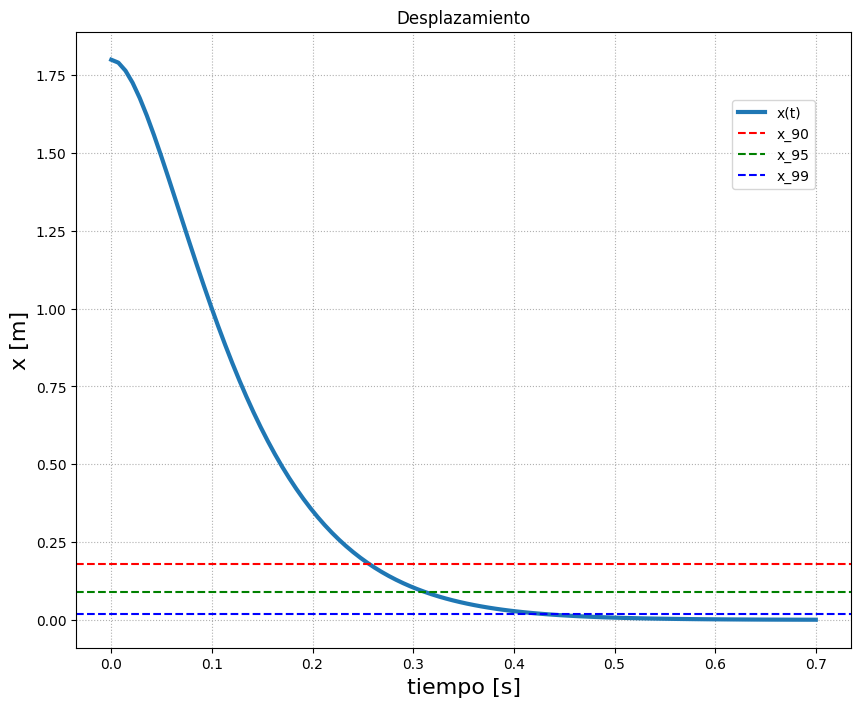

In [ ]:
# Grafica la función
plt.figure(figsize=(10,8))
plt.title('Desplazamiento')
plt.xlabel('tiempo [s]', fontsize=16)
plt.ylabel('x [m]', fontsize=16)
plt.grid(linestyle=":")
plt.plot(t,x(t), linewidth=3, label = "x(t)")
plt.axhline(y = x_90, color = 'r', linestyle = '--', label = "x_90")
plt.axhline(y = x_95, color = 'g', linestyle = '--', label = "x_95")
plt.axhline(y = x_99, color = 'b', linestyle = '--', label = "x_99")

# plotting the legend
plt.legend(bbox_to_anchor = (0.9, 0.9), loc = 'upper center')

plt.show()

In [ ]:
def x_1(t):
  y_1 = x(t) - x_90
  return y_1

def x_2(t):
  y_2 = x(t) - x_95
  return y_2

def x_3(t):
  y_3 = x(t) - x_99
  return y_3

In [ ]:
t_90 = fsolve(x_1,0.3)
t_95 = fsolve(x_2,0.35)
t_99 = fsolve(x_3,0.5)

In [ ]:
#@title Resultados:
print('Tiempos:\t\t\tDesplazamientos:')
print('t_90 = %.4f [s]\t\tx_90 = %.4f [m]'%(t_90,x_90))
print('t_95 = %.4f [s]\t\tx_95 = %.4f [m]'%(t_95,x_95))
print('t_99 = %.4f [s]\t\tx_99 = %.4f [m]'%(t_99,x_99))

Tiempos:			Desplazamientos:
t_90 = 0.2560 [s]		x_90 = 0.1800 [m]
t_95 = 0.3113 [s]		x_95 = 0.0900 [m]
t_99 = 0.4327 [s]		x_99 = 0.0180 [m]


In [ ]:
#%reset -s -f